# Machine Learning In Python
## Lab One: Exploring Table Data
Authors:
* Travis Peck - Graduate
* Quinn Matthews - Undergraduate
* Tyler Olbright - Undergraduate
* Chris Hirschbrich - Undergraduate

# Business Analysis
This dataset contains data about employees of an undisclosed Indian company. Features of the dataset include the highest education level of its employees, year of joining, city where the employee is based out of, the 'salary tier' of the employees, age and gender of the employees, a binary column of if an employee has ever been 'benched' (temporarily assigned no work), how many years of related experience the employees have, and whether the employee left the company or not. This last feature is the variable we are trying to predict (dependent variable), using all of the previous data as the predictor variables. This company was trying to determine what factors are indicative of if an employee chooses to leave the company or not. This can, of course, be useful to other companies who are trying to increase their employee retention rate. In order for an predictive algorithm to be considered useful, there should be a statistically significant correlation between the dependent and independent variables. Alternatively, we can use this data to make a decision tree that could help classify whether a particular employee will likely leave or not. 


Dataset: [Employee Dataset](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset)

In [46]:
# Import Data
import pandas as pd
import numpy as np

df = pd.read_csv('./Employee.csv')

# Data Preprocessing
# Convert EverBenched to 0 and 1
df['EverBenched'] = df['EverBenched'].map({'Yes': 1, 'No': 0})

df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,0,0,0
1,Bachelors,2013,Pune,1,28,Female,0,3,1
2,Bachelors,2014,New Delhi,3,38,Female,0,2,0
3,Masters,2016,Bangalore,3,27,Male,0,5,1
4,Masters,2017,Pune,3,24,Male,1,2,1


# Data Description
| Column Name | Description | Type | Range |
| --- | --- | --- | --- |
| Education | Highest education level of the employee | Categorical | 'Bachelors', 'Masters', 'PHD' |
| JoiningYear | Year the employee joined the company | Integer | 2012 - 2018 |
| City | City where the employee is based out of | Categorical | 'Bangalore', 'Pune', 'New Delhi' |
| PaymentTier | Salary tier of the employee | Categorical | 1 - 3 |
| Age | Age of the employee | Integer | 22 - 41 |
| Gender | Gender of the employee | Categorical | 'Male', 'Female' |
| EverBenched | Binary column of if an employee has ever been 'benched' | Binary | 0 - 1 |
| ExperienceInCurrentDomain | Years of related experience the employee has | Integer | 0 - 7 |
| LeftOrNot | Whether the employee left the company or not | Binary | 0 - 1 |



In [47]:
# Show the number of rows and columns
print(df.shape)

# Show the data type of each column
print(df.dtypes)


(4653, 9)
Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                   int64
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


# Data Quality

## Missing Values

In [48]:
# Show the number of missing values in each column
print(df.isnull().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


As shown above, there are no missing values in the data set.

## Duplicates

In [49]:
# Show the number of duplicated rows
print(df.duplicated().sum())

# Show as a percentage the number of duplicated rows
print((df.duplicated().sum() / df.shape[0] * 100).round(3), '%')

1889
40.597 %


There are a significant number of duplicates in the dataset. This is likely due to the fact that the company has multiple employees with the same characteristics (e.g. multiple employees with the same education level, joining year, city, etc.). This large of a number of duplicates is slightly suprising, but it is not necessarily unrealistic. It is possible that the company actually does have a large number of employees with the same characteristics and there are no ID numbers to differentiate between them. For this reason, we decided to not remove the duplicates from the dataset.

# Data Visualization
## Exploratory Distribution Plots

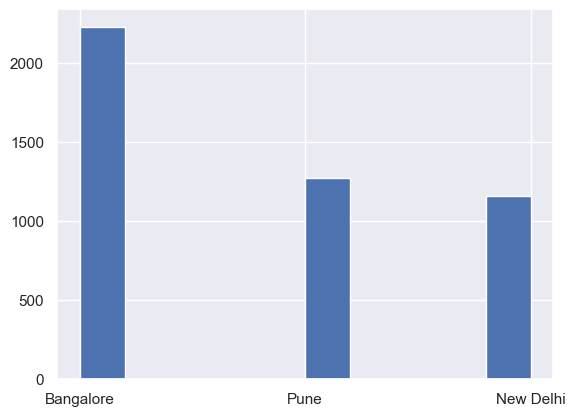

In [50]:
import matplotlib
import matplotlib.pyplot as plt

df['City'].hist()
plt.show()

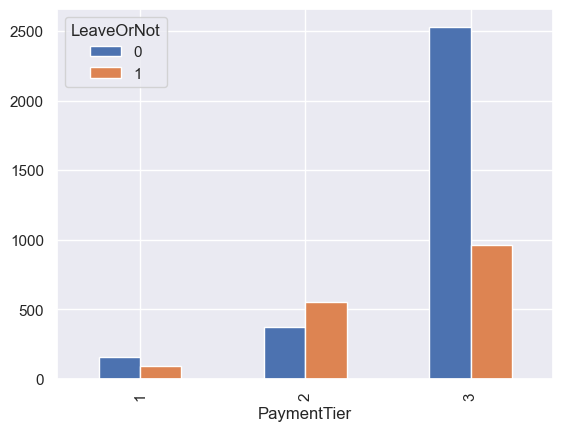

In [51]:
crosstb = pd.crosstab(df['PaymentTier'], df['LeaveOrNot'])
barplot = crosstb.plot.bar()

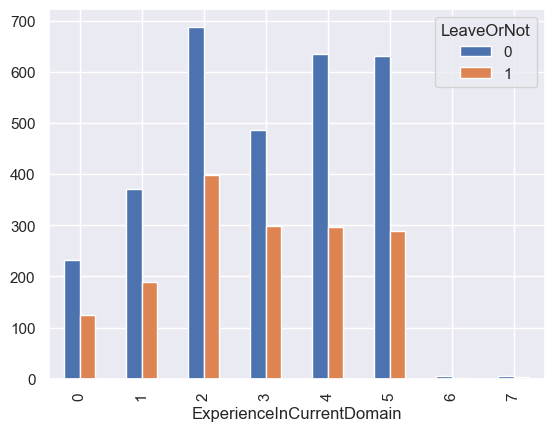

In [52]:
crosstab = pd.crosstab(df['ExperienceInCurrentDomain'], df['LeaveOrNot'])
barplot = crosstab.plot.bar()

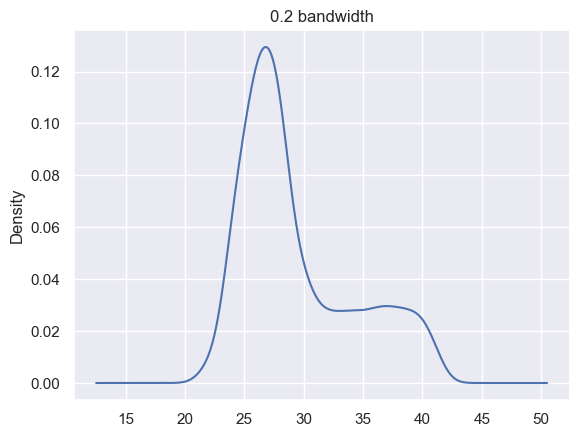

In [53]:
df['Age'].plot.kde(bw_method=0.2)
plt.title('0.2 bandwidth')
plt.show()

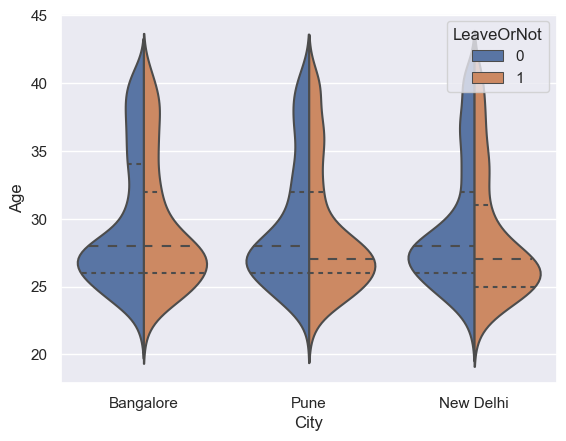

In [54]:
import seaborn as sns
sns.violinplot(x='City', 
               y='Age',
               hue='LeaveOrNot',
               split="True", 
               inner="quart",
               data=df)
plt.show()

# Data Correlation
It's important to see if there are any high levels of correlation between the variables in the dataset because 

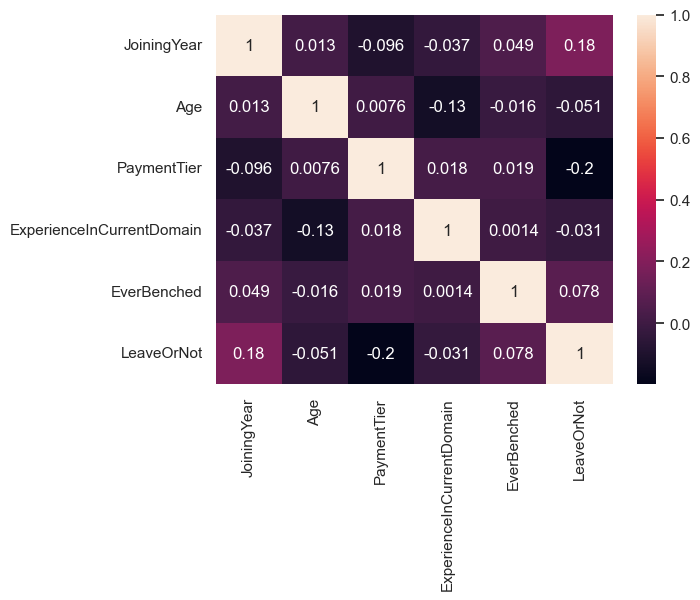

In [55]:
selected_columns = df[['JoiningYear', 'Age', 'PaymentTier', 'ExperienceInCurrentDomain', 'EverBenched', 'LeaveOrNot']] # Not Shown: Education, City, Gender 
correlation_matrix = selected_columns.corr() 
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#TODO It looks like there is some negative correlation between the payment tier and whether or not the employee left the company. Explain this. Also looks like a positive correlation between the joining year and whether or not the employee left the company. Explain this. Also may note that the correlation between the age and payment tier is very low, which is interesting because you would expect that to some extent the older the employee, the higher the payment tier but this may be off-topic for this analysis.